# 🎯 Logistic Regression from Scratch (Gradient Descent)
A concise walkthrough of the theory, maths and pure-NumPy implementation of binary logistic regression.

## 🔍 What is Logistic Regression?
- **Linear classifier** despite the name “regression”.  
- Models the **log-odds** of the positive class as a linear function of the features.  
- Outputs a **probability** via the sigmoid function.  
- Learns weights & bias by **minimising cross-entropy loss** with gradient descent.

## 🧮 Hypothesis – Sigmoid Function
For linear scores $z = \mathbf{w}^T\mathbf{x} + b$:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \in (0, 1)
$$

Interpretation: $\hat{p} = \sigma(z)$ is the **estimated probability** of class 1.

## 📉 Cost Function – Binary Cross-Entropy
For $m$ training samples:

$$
J(\mathbf{w}, b) = -\frac{1}{m}\sum_{i=1}^{m}\Big[y_i\log\hat{p}_i + (1 - y_i)\log(1 - \hat{p}_i)\Big]
$$

Minimising $J$ maximises the **log-likelihood** of the observed labels.

## ∇ Gradients
Let $\hat{p}_i = \sigma(\mathbf{w}^T\mathbf{x}_i + b)$.  
Then:

$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m}\mathbf{X}^T(\hat{\mathbf{p}} - \mathbf{y}) \\
\frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(\hat{p}_i - y_i)
$$

Update rules ($\alpha$ = learning rate):

$$
\mathbf{w} := \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} \\
b := b - \alpha \frac{\partial J}{\partial b}
$$

In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # zero init
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## 🧪 Dataset – Breast Cancer Wisconsin
Binary classification: benign (0) vs malignant (1).  
30 numeric features, 569 samples, shipped with scikit-learn.

In [2]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}, Classes: {len(set(y))}")

Samples: 569, Features: 30, Classes: 2


## ✂️ Train / Test Split
Hold-out 20 % for unbiased evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, stratify=ys
)

## 🎯 Training
Gradient descent will iterate 1 000 times with learning-rate 0.0001 (features are not scaled here; in practice you would standardise).

In [4]:
clf = LogisticRegression(learning_rate=0.0001, n_iters=1000)
clf.fit(X_train, y_train)

## 📏 Evaluation – Accuracy
Standard classification accuracy:

$$
\text{Accuracy} = \frac{1}{m}\sum_{i=1}^{m}\mathbb{1}[\hat{y}_i = y_i]
$$

In [5]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)
print(f"Logistic Regression accuracy: {acc:.2%}")

Logistic Regression accuracy: 93.86%


## 🎨 Decision Boundary (1-D Toy Example)
If you want to visualise, reduce to a single feature and plot sigmoid curve.

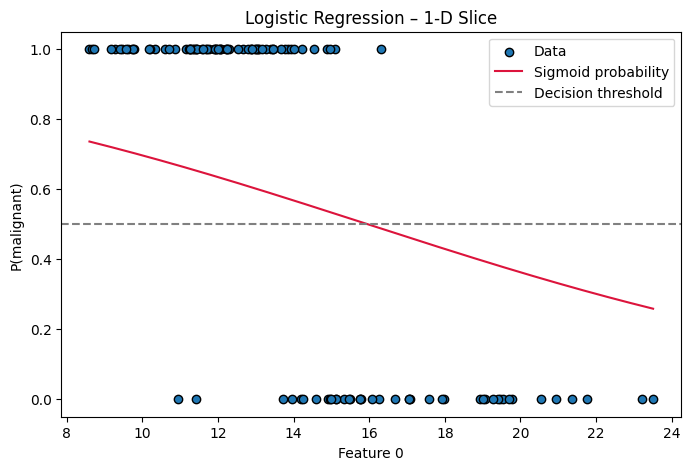

In [6]:
import matplotlib.pyplot as plt

# single-feature slice for plotting
X_vis = X_test[:, 0].reshape(-1, 1)
clf_vis = LogisticRegression(learning_rate=0.01, n_iters=3000)
clf_vis.fit(X_vis, y_test)

X_range = np.linspace(X_vis.min(), X_vis.max(), 300).reshape(-1, 1)
prob_range = clf_vis._sigmoid(np.dot(X_range, clf_vis.weights) + clf_vis.bias)

plt.figure(figsize=(8, 5))
plt.scatter(X_vis, y_test, color="tab:blue", edgecolors="k", label="Data")
plt.plot(X_range, prob_range, color="crimson", label="Sigmoid probability")
plt.axhline(0.5, color="grey", linestyle="--", label="Decision threshold")
plt.xlabel("Feature 0")
plt.ylabel("P(malignant)")
plt.title("Logistic Regression – 1-D Slice")
plt.legend()
plt.show()

## ✅ Summary – Equations Recap
- **Hypothesis**: $\hat{p} = \sigma(\mathbf{w}^T\mathbf{x} + b)$  
- **Loss**: $J = -\frac{1}{m}\sum\Big[y\log\hat{p} + (1 - y)\log(1 - \hat{p})\Big]$  
- **Gradients**: $\nabla_{\mathbf{w}}J = \frac{1}{m}\mathbf{X}^T(\hat{\mathbf{p}} - \mathbf{y})$  
- **Update**: $\mathbf{w} := \mathbf{w} - \alpha \nabla_{\mathbf{w}}J$  
- **Prediction**: $$\hat{y} = \mathbb{1}[\hat{p} > 0.5]$$

Feel free to experiment: add **L2-regularisation**, switch to **liblinear**-style SGD, or extend to **softmax** for multiclass!